<a href="https://colab.research.google.com/github/mirianbatista/vacinas/blob/master/api_vacina_covid_detalhes_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
from requests.auth import HTTPBasicAuth     
r = requests.get('https://imunizacao-es.saude.gov.br/desc-imunizacao/_search', auth=('imunizacao_public', 'qlto5t&7r_@+#Tlstigi'))  

In [2]:
import json

a = json.loads(r.text)

res = pd.json_normalize(a)
#print(res)

df = pd.DataFrame(res)
df

,took,timed_out,_shards.total,_shards.successful,_shards.skipped,_shards.failed,hits.total.value,hits.total.relation,hits.max_score,hits.hits
0,9,False,30,30,0,0,10000,gte,1.0,"[{'_index': 'desc-imunizacao-v5', '_type': '_d..."


In [3]:
df.rename(columns={"hits.hits": 'hits'}, inplace=True)

In [4]:
df

,took,timed_out,_shards.total,_shards.successful,_shards.skipped,_shards.failed,hits.total.value,hits.total.relation,hits.max_score,hits
0,9,False,30,30,0,0,10000,gte,1.0,"[{'_index': 'desc-imunizacao-v5', '_type': '_d..."


In [5]:
q = df[['hits']]
q

,hits
0,"[{'_index': 'desc-imunizacao-v5', '_type': '_d..."


In [6]:
qq = pd.DataFrame(q['hits'].explode().tolist())
qq

,_index,_type,_id,_score,_source
0,desc-imunizacao-v5,_doc,2deb8834-2b35-4935-989a-c21695571ce6-i0b0,1.0,{'document_id': '2deb8834-2b35-4935-989a-c2169...
1,desc-imunizacao-v5,_doc,a8ab1829-b95f-4295-98cc-5e9a7afbdac3-i0b0,1.0,{'document_id': 'a8ab1829-b95f-4295-98cc-5e9a7...
2,desc-imunizacao-v5,_doc,6f5ec669-1ce3-4a03-a128-f7e7bf4a8c2f-i0b0,1.0,{'document_id': '6f5ec669-1ce3-4a03-a128-f7e7b...
3,desc-imunizacao-v5,_doc,9144ddc9-019c-4fe8-9464-147ca0a0e6d6-i0b0,1.0,{'document_id': '9144ddc9-019c-4fe8-9464-147ca...
4,desc-imunizacao-v5,_doc,90b731b3-49fd-4f11-887a-d1a3a64af976-i0b0,1.0,{'document_id': '90b731b3-49fd-4f11-887a-d1a3a...
5,desc-imunizacao-v5,_doc,6be2177b-4630-496f-8ca3-237bed3301e0-i0b0,1.0,{'document_id': '6be2177b-4630-496f-8ca3-237be...
6,desc-imunizacao-v5,_doc,133949b0-5318-4e93-aff9-1e4f63842b8b-i0b0,1.0,{'document_id': '133949b0-5318-4e93-aff9-1e4f6...
7,desc-imunizacao-v5,_doc,2798e616-f279-49cc-b170-5b6d475ccb2b-i0b0,1.0,{'document_id': '2798e616-f279-49cc-b170-5b6d4...
8,desc-imunizacao-v5,_doc,14ccb608-d059-4adb-a3e7-05d084e1cb63-i0b0,1.0,{'document_id': '14ccb608-d059-4adb-a3e7-05d08...
9,desc-imunizacao-v5,_doc,64520627-db52-4771-815f-a088a6aae4d0-i0b0,1.0,{'document_id': '64520627-db52-4771-815f-a088a...


In [7]:
a = pd.json_normalize(qq._source)
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 40 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   document_id                               10 non-null     object
 1   paciente_id                               10 non-null     object
 2   paciente_enumSexoBiologico                10 non-null     object
 3   vacina_nome                               10 non-null     object
 4   dt_deleted                                0 non-null      object
 5   vacina_codigo                             10 non-null     object
 6   paciente_racaCor_valor                    10 non-null     object
 7   sistema_origem                            10 non-null     object
 8   paciente_endereco_coIbgeMunicipio         10 non-null     object
 9   paciente_dataNascimento                   10 non-null     object
 10  @timestamp                                10 non-null

In [8]:
pd.set_option('display.max_columns', None)
a[:3]

,document_id,paciente_id,paciente_enumSexoBiologico,vacina_nome,dt_deleted,vacina_codigo,paciente_racaCor_valor,sistema_origem,paciente_endereco_coIbgeMunicipio,paciente_dataNascimento,@timestamp,paciente_endereco_cep,vacina_dataAplicacao,data_importacao_datalake,estabelecimento_municipio_nome,estabelecimento_razaoSocial,vacina_numDose,paciente_endereco_uf,estabelecimento_uf,vacina_lote,vacina_grupoAtendimento_codigo,paciente_nacionalidade_enumNacionalidade,paciente_endereco_nmMunicipio,estabelecimento_valor,paciente_endereco_coPais,paciente_endereco_nmPais,@version,data_importacao_rnds,estabelecimento_municipio_codigo,id_sistema_origem,vacina_categoria_nome,vacina_fabricante_referencia,status,vacina_categoria_codigo,vacina_descricao_dose,paciente_idade,vacina_fabricante_nome,vacina_grupoAtendimento_nome,estalecimento_noFantasia,paciente_racaCor_codigo
0,2deb8834-2b35-4935-989a-c21695571ce6-i0b0,9842193f8a475577dc2dcdfedc96c51c5953e6e32a7b63...,M,COVID-19 JANSSEN - Ad26.COV2.S,None,88,BRANCA,VACIVIDA,355030,1955-05-22,2022-05-26T20:07:39.340Z,05044,2022-05-26T00:00:00.000Z,2022-05-26T18:08:16.000Z,SAO PAULO,PREFEITURA DO MUNICIPIO DE SAO PAULO,38,SP,SP,205H21A,000202,B,SAO PAULO,2789248,10,BRASIL,1,2022-05-26T12:05:58.000Z,355030,18262,Faixa Etária,None,final,2,Reforço,67,JANSSEN,Pessoas de 65 a 69 anos,UBS V ROMANA,01
1,a8ab1829-b95f-4295-98cc-5e9a7afbdac3-i0b0,818a0eaa88e756d755e634d57b0fdc02e7af19f553879c...,M,COVID-19 JANSSEN - Ad26.COV2.S,None,88,PARDA,Novo PNI,270880,2003-09-05,2022-05-26T20:07:39.340Z,57275,2022-05-24T00:00:00.000Z,2022-05-26T18:08:16.000Z,SAO SEBASTIAO,MUNICIPIO DE SAO SEBASTIAO,38,AL,AL,211J21A,000201,B,SAO SEBASTIAO,2719789,10,BRASIL,1,2022-05-26T13:03:55.000Z,270880,16341,Faixa Etária,Organization/30587,final,2,Reforço,18,JANSSEN,Pessoas de 18 a 64 anos,UNIDADE BASICA DE SAUDE MESTRA CLARICE,03
2,6f5ec669-1ce3-4a03-a128-f7e7bf4a8c2f-i0b0,15c0c00ee75be5da8c4b952a309d688051f083be4cbecb...,F,COVID-19 PFIZER - COMIRNATY,None,87,AMARELA,Novo PNI,150240,1996-08-16,2022-05-26T20:07:39.407Z,68747,2022-02-10T00:00:00.000Z,2022-05-26T18:08:16.000Z,SANTA IZABEL DO PARA,PREFEITURA MUNICIPAL DE SANTA IZABEL DO PARA,38,PA,PA,FM2951,000201,B,CASTANHAL,2314142,10,BRASIL,1,2022-05-26T15:43:12.000Z,150650,16341,Faixa Etária,Organization/28290,final,2,Reforço,25,PFIZER,Pessoas de 18 a 64 anos,ESFSB BAIRRO NOVO,04


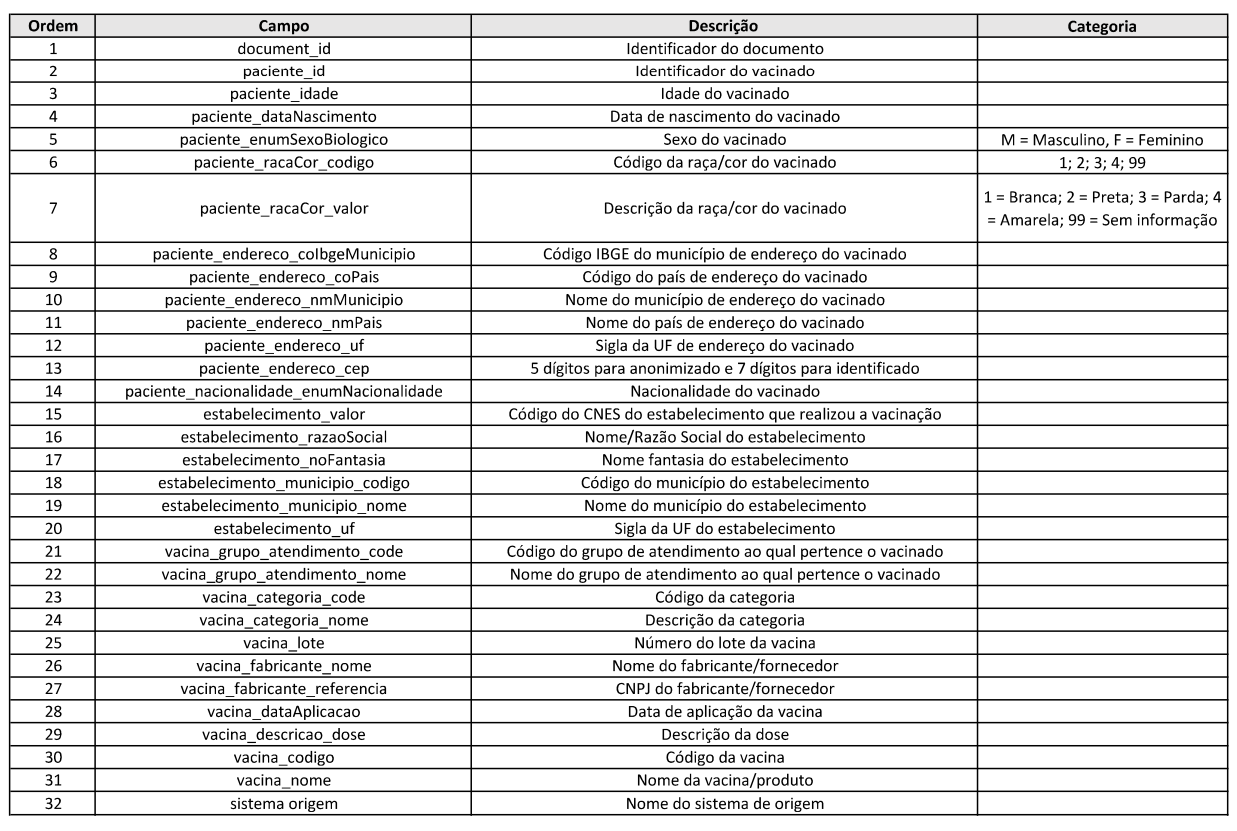

https://opendatasus.saude.gov.br/dataset/8e0c325d-2586-4b11-8925-4ba51acd6e6d/resource/a8308b58-8898-4c6d-8119-400c722c71b5/download/dicionario-de-dados-vacinacao.pdf